In [69]:
import os
os.getcwd()
os.listdir()


['analysecommune.ipynb',
 '.DS_Store',
 'cog_ensemble_2025_csv',
 'export_moyenne.csv',
 'donnees_webscrap.csv',
 'ind_atmo_2021.csv',
 'cog_ensemble_2025_csv.zip',
 'Pollution_france.csv']

In [122]:
import pandas as pd

poll = pd.read_csv("donnees_webscrap.csv", sep=",")
poll.head()
poll.shape


(1300, 4)

In [123]:
poll.sort_values("pm10", ascending=False).head(30)


,Commune,pm10,pm25,no2
935,PARIS 18,28.0,15.0,49.0
934,PARIS 17,28.0,15.0,45.0
1132,ST OUEN,27.0,14.0,35.0
919,PARIS 02,27.0,15.0,52.0
279,CLICHY,27.0,14.0,44.0
936,PARIS 19,27.0,15.0,40.0
41,AUBERVILLIERS,27.0,14.0,35.0
927,PARIS 10,27.0,15.0,47.0
923,PARIS 06,26.0,14.0,46.0
392,EVRY,26.0,14.0,54.0


In [98]:
df = poll.copy()

df["rank_pm10"] = df["pm10"].rank(ascending=False)
df["rank_pm25"] = df["pm25"].rank(ascending=False)
df["rank_no2"]  = df["no2"].rank(ascending=False)

df["rank_moyen_pollution"] = (
    df["rank_pm10"] + df["rank_pm25"] + df["rank_no2"]
) / 3

df.sort_values("rank_moyen_pollution").head(10)
df.shape


(1300, 8)

In [181]:
filo = pd.read_csv("../revenus/FILO2019_DISP_COM.csv", sep=";")
filo.head()
filo.shape


/var/folders/6z/_1t9r8nd1jj44c1l66gyqdbc0000gn/T/ipykernel_3443/2165264783.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  filo = pd.read_csv("../revenus/FILO2019_DISP_COM.csv", sep=";")


(31361, 732)

In [154]:
# Copie propre
poll_clean = poll.copy()

# Normalisation du nom de commune
poll_clean["commune"] = (
    poll_clean["Commune"]
    .str.strip()
    .str.upper()
)

# Exclure Paris intra-muros
poll_clean = poll_clean[~poll_clean["commune"].str.startswith("PARIS")]
poll_clean.shape


(1280, 5)

In [155]:
poll_clean.head()

,Commune,pm10,pm25,no2,commune
0,ABBEVILLE LA RIVIERE,15.0,8.0,8.0,ABBEVILLE LA RIVIERE
1,ABLEIGES,18.0,9.0,13.0,ABLEIGES
2,ABLIS,15.0,8.0,13.0,ABLIS
3,ABLON SUR SEINE,17.0,10.0,24.0,ABLON SUR SEINE
4,ACHERES,19.0,10.0,21.0,ACHERES


In [156]:
poll_clean["Commune_clean"] = (
    poll_clean["Commune"]
    .str.upper()
    .str.replace(r"\bST\b", "SAINT", regex=True)
)

poll_clean.shape


(1280, 6)

In [130]:
communes["Commune"].duplicated().sum()



np.int64(2870)

In [77]:
import os
os.getcwd()


'/Users/piaralyluna/Documents/luna_ecole/ensae_2A/projet_python/data/pollution'

In [150]:
communes = pd.read_csv(
    "cog_ensemble_2025_csv/v_commune_2025.csv",
    sep=",",
    quotechar='"'
)

communes = communes[communes["REG"] == 11].copy()

communes = communes[["COM", "NCC"]]

communes = communes.rename(columns={
    "COM": "CODGEO",
    "NCC": "Commune"
})





In [153]:
communes.head(10)


,CODGEO,Commune
31481,75056,PARIS
31482,75101,PARIS 1ER ARRONDISSEMENT
31483,75102,PARIS 2E ARRONDISSEMENT
31484,75103,PARIS 3E ARRONDISSEMENT
31485,75104,PARIS 4E ARRONDISSEMENT
31486,75105,PARIS 5E ARRONDISSEMENT
31487,75106,PARIS 6E ARRONDISSEMENT
31488,75107,PARIS 7E ARRONDISSEMENT
31489,75108,PARIS 8E ARRONDISSEMENT
31490,75109,PARIS 9E ARRONDISSEMENT


In [158]:
communes.shape


(1286, 2)

In [161]:
communes["Commune"].duplicated().sum()

communes["Commune"].value_counts().head(20)


Commune
BLANDY                     2
SAINT MARTIN DES CHAMPS    2
MONDREVILLE                2
MAROLLES EN BRIE           2
FLEURY MEROGIS             1
FORGES LES BAINS           1
FORET SAINTE CROIX         1
FORET LE ROI               1
FONTENAY LE VICOMTE        1
FONTENAY LES BRIIS         1
FONTAINE LA RIVIERE        1
PARIS                      1
GIRONVILLE SUR ESSONNE     1
FERTE ALAIS                1
EVRY COURCOURONNES         1
ETRECHY                    1
ETIOLLES                   1
ETAMPES                    1
EPINAY SUR ORGE            1
EPINAY SOUS SENART         1
Name: count, dtype: int64

In [163]:
communes = communes.drop_duplicates(subset=["Commune"], keep="first")

communes["Commune"].is_unique


True

In [174]:
poll_clean = poll_clean.merge(
    communes,
    left_on="Commune_clean",
    right_on="Commune",
    how="left",
    validate="m:1"
)


poll_clean.head(10)


,pm10,pm25,no2,commune,Commune_clean,CODGEO_x,CODGEO_y,Commune
0,15.0,8.0,8.0,ABBEVILLE LA RIVIERE,ABBEVILLE LA RIVIERE,91001,91001,ABBEVILLE LA RIVIERE
1,18.0,9.0,13.0,ABLEIGES,ABLEIGES,95002,95002,ABLEIGES
2,15.0,8.0,13.0,ABLIS,ABLIS,78003,78003,ABLIS
3,17.0,10.0,24.0,ABLON SUR SEINE,ABLON SUR SEINE,94001,94001,ABLON SUR SEINE
4,19.0,10.0,21.0,ACHERES,ACHERES,78005,78005,ACHERES
5,14.0,8.0,8.0,ACHERES LA FORET,ACHERES LA FORET,77001,77001,ACHERES LA FORET
6,20.0,8.0,9.0,ADAINVILLE,ADAINVILLE,78006,78006,ADAINVILLE
7,17.0,9.0,17.0,AIGREMONT,AIGREMONT,78007,78007,AIGREMONT
8,16.0,9.0,9.0,AINCOURT,AINCOURT,95008,95008,AINCOURT
9,19.0,12.0,33.0,ALFORTVILLE,ALFORTVILLE,94002,94002,ALFORTVILLE


In [180]:
poll_clean["CODGEO"] = poll_clean["CODGEO_x"]
poll_clean.head(4)

poll_clean_geo = poll_clean.dropna(subset=["CODGEO"])


In [182]:

poll_clean_geo.duplicated().sum()


np.int64(0)

In [194]:
poll_clean_geo.head(5)




,pm10,pm25,no2,commune,Commune_clean,CODGEO_x,CODGEO_y,Commune,CODGEO
0,15.0,8.0,8.0,ABBEVILLE LA RIVIERE,ABBEVILLE LA RIVIERE,91001,91001,ABBEVILLE LA RIVIERE,91001
1,18.0,9.0,13.0,ABLEIGES,ABLEIGES,95002,95002,ABLEIGES,95002
2,15.0,8.0,13.0,ABLIS,ABLIS,78003,78003,ABLIS,78003
3,17.0,10.0,24.0,ABLON SUR SEINE,ABLON SUR SEINE,94001,94001,ABLON SUR SEINE,94001
4,19.0,10.0,21.0,ACHERES,ACHERES,78005,78005,ACHERES,78005


In [187]:
filo.columns


Index(['CODGEO', 'NBMEN19', 'NBPERS19', 'NBUC19', 'Q119', 'Q219', 'Q319',
       'Q3_Q1', 'D119', 'D219',
       ...
       'OPR6PTSA19', 'OPR6PCHO19', 'OPR6PBEN19', 'OPR6PPEN19', 'OPR6PPAT19',
       'OPR6PPSOC19', 'OPR6PPFAM19', 'OPR6PPMINI19', 'OPR6PPLOGT19',
       'OPR6PIMPOT19'],
      dtype='object', length=732)

In [215]:
filo_cols = [
    "CODGEO",
    # tailles / structure
    "NBMEN19", "NBPERS19", "NBUC19",

    # niveau de vie
    "Q119", "Q219", "Q319", "Q3_Q1",

    # déciles bas
    "D119", "D219",

    # inégalités (très utiles)
    "GI19",        # indice de Gini
    "S80S2019"     # ratio S80/S20
]

# on garde uniquement celles qui existent (sécurité)
filo_cols = [c for c in filo_cols if c in filo.columns]

filo_small = filo[filo_cols].copy()
filo_small.head()




,CODGEO,NBMEN19,NBPERS19,NBUC19,Q119,Q219,Q319,Q3_Q1,D119,D219,GI19,S80S2019
0,1001,322,819,542.7,NaN,23970,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,113,263,177.2,NaN,23640,NaN,NaN,NaN,NaN,NaN,NaN
2,1004,6711,15040,10296.8,14940.0,20510,27310.0,12370.0,11080.0,13800.0,0.290,4.2
3,1005,720,1823,1204.3,NaN,24050,NaN,NaN,NaN,NaN,NaN,NaN
4,1007,1160,2853,1888.8,18560.0,23380,29570.0,11020.0,14360.0,17450.0,0.206,2.9


In [217]:
df_final = poll_clean_geo.merge(
    filo_small,
    on="CODGEO",
    how="inner"   # communes présentes dans les 2
)



In [218]:
print(poll_clean_geo["CODGEO"].dtype)


object


In [196]:
print(filo_small["CODGEO"].dtype)


object


In [219]:

poll_clean_geo["CODGEO"].astype(str).str.len().value_counts().head(10)
filo_small["CODGEO"].astype(str).str.len().value_counts().head(10)


CODGEO
5    28699
4     2662
Name: count, dtype: int64

In [220]:

filo_small["CODGEO"] = (
    filo_small["CODGEO"]
    .astype(str)
    .str.replace(r"\.0$", "", regex=True)
    .str.zfill(5)
)


In [221]:
poll_clean_geo["CODGEO"] = (
    poll_clean_geo["CODGEO"]
    .astype(str)
    .str.replace(r"\.0$", "", regex=True)
    .str.zfill(5)
)



/var/folders/6z/_1t9r8nd1jj44c1l66gyqdbc0000gn/T/ipykernel_3443/3460373648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poll_clean_geo["CODGEO"] = (


In [222]:
df_final = poll_clean_geo.merge(
    filo_small,
    on="CODGEO",
    how="inner"
)
df_final.head(5)


,pm10,pm25,no2,commune,Commune_clean,CODGEO_x,CODGEO_y,Commune,CODGEO,NBMEN19,NBPERS19,NBUC19,Q119,Q219,Q319,Q3_Q1,D119,D219,GI19,S80S2019
0,15.0,8.0,8.0,ABBEVILLE LA RIVIERE,ABBEVILLE LA RIVIERE,91001,91001,ABBEVILLE LA RIVIERE,91001,120,336,215.1,NaN,24590,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,9.0,13.0,ABLEIGES,ABLEIGES,95002,95002,ABLEIGES,95002,415,1153,734.5,NaN,28270,NaN,NaN,NaN,NaN,NaN,NaN
2,15.0,8.0,13.0,ABLIS,ABLIS,78003,78003,ABLIS,78003,1271,3563,2273.1,20980.0,25970,31850.0,10870.0,16030.0,19560.0,0.208,2.9
3,17.0,10.0,24.0,ABLON SUR SEINE,ABLON SUR SEINE,94001,94001,ABLON SUR SEINE,94001,2277,5741,3758.5,16670.0,22780,29720.0,13050.0,11530.0,15280.0,0.270,4.1
4,19.0,10.0,21.0,ACHERES,ACHERES,78005,78005,ACHERES,78005,8698,22032,14440.1,16270.0,22260,30120.0,13850.0,12030.0,15090.0,0.257,3.8


In [223]:
df_corr = df_final[["pm25", "Q219"]].dropna()
df_corr.shape



(1115, 2)

In [224]:

df_corr.corr()


,pm25,Q219
pm25,1.000000,-0.180194
Q219,-0.180194,1.000000


In [225]:
df_corr_pm10 = df_final[["pm10", "Q219"]].dropna()
df_corr_pm10.shape


(1114, 2)

In [226]:
df_corr_pm10.corr()



,pm10,Q219
pm10,1.000000,-0.158626
Q219,-0.158626,1.000000


In [210]:
df_corr_no2 = df_final[["no2", "Q219"]].dropna()
df_corr_no2.shape


(1116, 2)

In [211]:
df_corr_no2.corr()


,no2,Q219
no2,1.000000,-0.031116
Q219,-0.031116,1.000000


In [227]:
# pollution vs niveau de vie
df_final[["pm25", "Q219"]].dropna().corr()

# pollution vs inégalités
df_final[["pm25", "GI19", "S80S2019"]].dropna().corr()

# pollution vs taille (contrôle)
df_final[["pm25", "NBPERS19"]].corr()



,pm25,NBPERS19
pm25,1.000000,0.649413
NBPERS19,0.649413,1.000000


In [228]:
# pollution vs inégalités
df_final[["pm25", "GI19", "S80S2019"]].dropna().corr()

,pm25,GI19,S80S2019
pm25,1.000000,0.415740,0.443022
GI19,0.415740,1.000000,0.966995
S80S2019,0.443022,0.966995,1.000000


In [229]:
df_final["q_q219"] = pd.qcut(df_final["Q219"], 4, labels=False)

df_final.groupby("q_q219")[["pm25", "pm10", "no2"]].mean()


,pm25,pm10,no2
q_q219,,,
0,9.444444,17.276978,15.620072
1,8.878571,16.526882,12.414286
2,8.834532,16.422939,13.125448
3,8.985612,16.564748,15.715827


In [230]:
df_final["q_gini"] = pd.qcut(df_final["GI19"], 4, labels=False)

df_final.groupby("q_gini")[["pm25"]].mean()


,pm25
q_gini,
0.0,8.958333
1.0,9.401639
2.0,9.798319
3.0,10.444444


In [232]:
import statsmodels.api as sm
sm.__version__


ModuleNotFoundError: No module named 'statsmodels'

In [231]:
import numpy as np
import statsmodels.api as sm

df_reg = df_final[["pm25", "Q219", "GI19", "NBPERS19"]].dropna()
df_reg["log_pop"] = np.log(df_reg["NBPERS19"])

X = df_reg[["Q219", "GI19", "log_pop"]]
X = sm.add_constant(X)
y = df_reg["pm25"]

model = sm.OLS(y, X).fit()
model.summary()


ModuleNotFoundError: No module named 'statsmodels'

In [233]:
df_final[["pm25", "Q119"]].dropna().corr()


,pm25,Q119
pm25,1.000000,-0.364881
Q119,-0.364881,1.000000


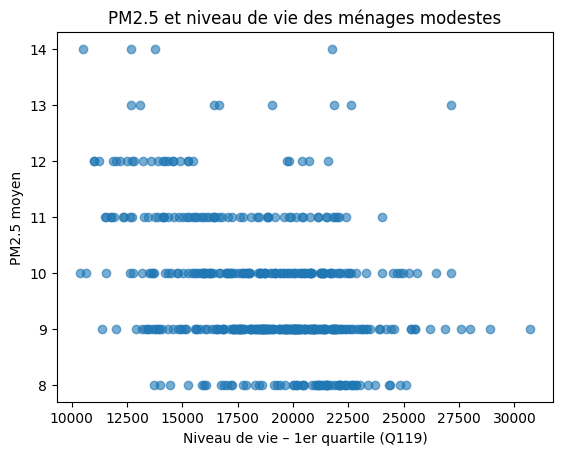

In [234]:
import matplotlib.pyplot as plt

plt.scatter(df_final["Q119"], df_final["pm25"], alpha=0.6)
plt.xlabel("Niveau de vie – 1er quartile (Q119)")
plt.ylabel("PM2.5 moyen")
plt.title("PM2.5 et niveau de vie des ménages modestes")
plt.show()
